### nc2zarr demo notebook

 Import some necessary libraries.

In [1]:
import s3fs
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import xcube.core.store

Create an S3 file system, and define a function which opens a dataset using it.

In [2]:
s3_file_system = s3fs.S3FileSystem(anon=True)
def open_with_s3fs(dataset_name):
    """Return a dataset opened via S3FS."""
    fs_map = s3fs.S3Map(f"s3://cop-services/{dataset_name}", s3=s3_file_system)
    return xr.open_zarr(store=fs_map)

Create an xcube S3 store as an alternative way to open datasets.

In [3]:
xcube_store = xcube.core.store.new_data_store("s3", anon=True, bucket_name="cop-services")

Define a function to plot the CHL variable of a dataset.

In [4]:
def plot_chl(dataset, time_slice=0):
    """Plot the CHL variable of a dataset"""
    chl = dataset.CHL[time_slice]
    chl_flip = chl[::-1, :]
    threshold = 0.01 # below this threshold, it's probably land
    land_value = -5 # value to use for below-threshold data points
    plt.imshow(np.where(chl_flip >= threshold, np.log(chl_flip), land_value))

Below are demonstrations of opening and plotting datasets using both S3FS and the xcube S3 store.

In [5]:
black_sea_name = "OCEANCOLOUR_BS_CHL_L4_NRT_OBSERVATIONS_009_045.zarr"
black_sea_via_s3fs = open_with_s3fs(black_sea_name)

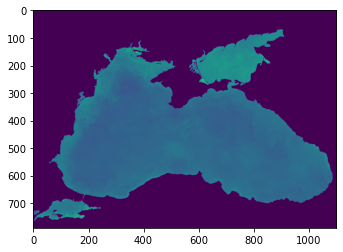

In [6]:
plot_chl(black_sea_via_s3fs)

In [7]:
black_sea_via_xcube = xcube_store.open_data(black_sea_name)

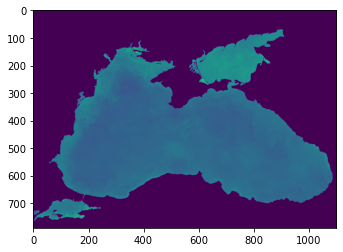

In [8]:
plot_chl(black_sea_via_xcube)

In [9]:
med_name = "OCEANCOLOUR_MED_CHL_L4_NRT_OBSERVATIONS_009_041.zarr"
med_via_s3fs = open_with_s3fs(med_name)

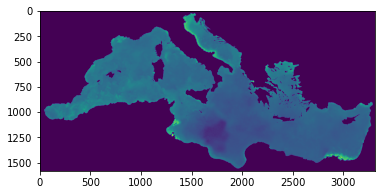

In [10]:
plot_chl(med_via_s3fs)

In [11]:
med_via_xcube = xcube_store.open_data(med_name)

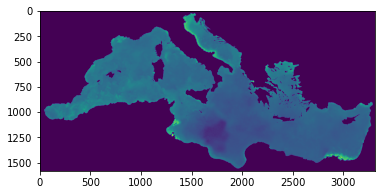

In [12]:
plot_chl(med_via_xcube)